This notebook outputs the prediction of a trained model and compares it to the validation dataset

In [4]:
import os    
os.environ['THEANO_FLAGS'] = "device=cpu" # use CPU for prediction, GPU is busy training!   
from keras.models import load_model
from keras import backend
backend.set_image_dim_ordering('th')

%matplotlib inline
from matplotlib import pyplot as plt

import helper

CLASSES = (0,) # which class(es) to predict

data_dir = '/data/dstl'
BAND = 'RGB'
N_BANDS = {'A': 8, 'M': 8, 'P': 1, 'RGB': 3}
INPUT_SIZES = {'A': 128, 'M': 256, 'P': 1024, 'RGB': 1024}

In [5]:
model = load_model(os.path.join(data_dir, 'unet_model.hdf5'))

Load the training and validation data sets, we will usually want to predict the validation data set for testing.

In [14]:
input_size = INPUT_SIZES[BAND]
X_val, y_val, X_trn, y_trn = helper.get_more_patches(BAND, input_size, repetitions=1, classes=CLASSES)

Load some trained weights for the model

In [15]:
# model.load_weights('weights/unet_bandRGB_score0.0778_classes{:s}.hdf5'.format(helper.classes_string(CLASSES)))
model.load_weights(os.path.join('..', 'models', 'unet', 'weights', 'unet_tmp_classes{:s}.hdf5'.format(helper.classes_string(CLASSES))))

In [16]:
y_prd = model.predict(X_val)

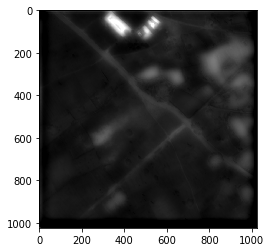

In [17]:
i = 3
plt.imshow(y_prd[i, :, :, :].sum(axis=(0,)), interpolation='none', 
           cmap='gray', vmin=y_prd[i, :, 100:-100, 100:-100].min(),
           vmax=y_prd[i, :, 100:-100, 100:-100].max())
plt.savefig('y_pred.png')

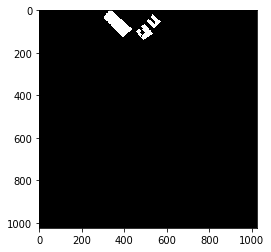

In [18]:
plt.imshow(y_val[i, :, :, :].sum(axis=0), interpolation='none', cmap='gray')
plt.savefig('y_val.png')

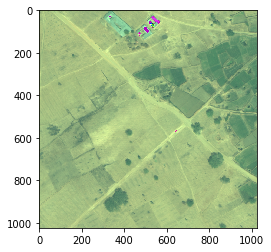

In [19]:
plt.imshow(X_val[i ,...].transpose([1, 2, 0]), interpolation='none')

In [21]:
X_val.max(axis=(-2, -1))

array([[-0.44504152, -0.39618955, -0.60527601],
       [-0.54665364, -0.48412311, -0.65021983],
       [-0.16560821, -0.07767465, -0.39912066],
       [ 1.        ,  1.        ,  1.        ],
       [ 1.        ,  0.79189057,  0.20078163]])